# **REFACTORING_MINER**

This notebook the description of the table `REFACTORING_MINER`.

First, we import the libraries we need and, then, we read the corresponding csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

refactoringMiner = pd.read_csv("../../data/raw/REFACTORING_MINER.csv")
refactoringMiner.shape

(57530, 4)

We show the first rows of the table to get an idea of its content.

In [2]:
refactoringMiner.loc[0:4]

,projectID,commitHash,refactoringType,refactoringDetail
0,accumulo,4093a3015d6b789888077e317e535df4c8102e5d,Extract Method,"Extract Method\tpublic rewriteURI(uri URI, tar..."
1,accumulo,123bd993cff822e02242197a24f47ee36bfa3744,Extract Variable,Extract Variable\tpath : String in method publ...
2,accumulo,8c04c6ae5e5ba1432e40684428338ce68431766b,Extract Variable,Extract Variable\tpath : String in method publ...
3,accumulo,812f18b4534ae1eec41845a70a53adb783e77d61,Rename Variable,Rename Variable\theader2 : Header to header : ...
4,accumulo,812f18b4534ae1eec41845a70a53adb783e77d61,Rename Variable,Rename Variable\theader1 : Header to header : ...


Next, for each attribute, we obtain some information.

In some cases, we do not plot anything because there are lots of unique values of which we are not interested in the distribution, as they are categorical values.

## projectID

In [3]:
pd.unique(refactoringMiner["projectID"])

array(['accumulo', 'ambari', 'atlas', 'aurora', 'batik', 'beam', 'cocoon',
       'commons-bcel', 'commons-beanutils', 'commons-cli',
       'commons-codec', 'commons-collections', 'commons-configuration',
       'commons-daemon', 'commons-dbcp', 'commons-dbutils',
       'commons-digester', 'commons-exec', 'commons-fileupload',
       'commons-io', 'commons-jelly', 'commons-jexl', 'commons-jxpath',
       'commons-net', 'commons-ognl', 'commons-validator', 'commons-vfs',
       'felix', 'httpcomponents-client', 'httpcomponents-core',
       'mina-sshd', 'santuario', 'zookeeper'], dtype=object)

In [4]:
pd.unique(refactoringMiner["projectID"]).size

33

<BarContainer object of 33 artists>

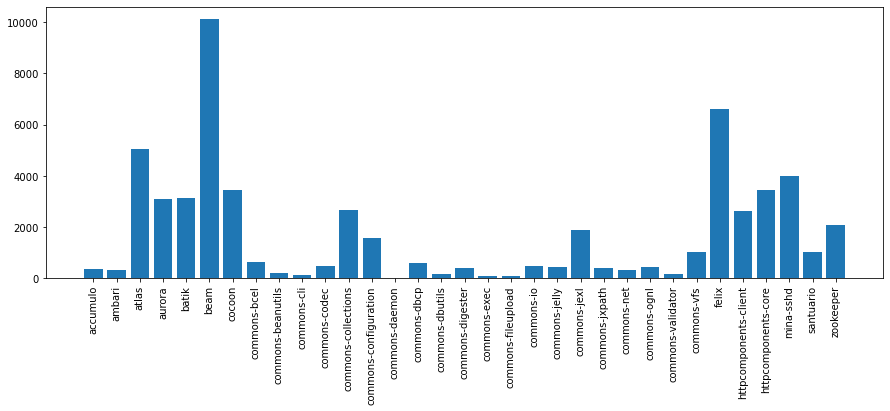

In [5]:
d = {}
for p in refactoringMiner["projectID"]:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## commitHash

In [6]:
commitHash = refactoringMiner["commitHash"]
commitHash

0        4093a3015d6b789888077e317e535df4c8102e5d
1        123bd993cff822e02242197a24f47ee36bfa3744
2        8c04c6ae5e5ba1432e40684428338ce68431766b
3        812f18b4534ae1eec41845a70a53adb783e77d61
4        812f18b4534ae1eec41845a70a53adb783e77d61
                           ...                   
57525    344a30792bb30430a5949fa20ae69872c42394e0
57526    344a30792bb30430a5949fa20ae69872c42394e0
57527    a1c481ceca909e32ec49ff9738b5355eb1c367a7
57528    3eed1f68e7fcf50b54e67afff46c205c7762da7e
57529    3eed1f68e7fcf50b54e67afff46c205c7762da7e
Name: commitHash, Length: 57530, dtype: object

In [7]:
pd.unique(commitHash).size

11699

In [8]:
nans = commitHash.isna().sum()
nans

2

## refactoringType

In [9]:
refactoringType = refactoringMiner["refactoringType"]
pd.unique(refactoringType)

array(['Extract Method', 'Extract Variable', 'Rename Variable',
       'Extract Superclass', 'Pull Up Method', 'Pull Up Attribute',
       'Rename Method', 'Rename Attribute', 'Rename Parameter',
       'Rename Class', 'Extract Class', 'Move Method',
       'Extract And Move Method', 'Move Class', 'Inline Method',
       'Move Attribute', 'Parameterize Variable', 'Extract Subclass',
       'Push Down Method', 'Push Down Attribute', 'Move Source Folder',
       'Inline Variable', 'Replace Variable With Attribute',
       'Change Package', 'Move And Rename Class', 'Replace Attribute',
       'Move And Rename Attribute', 'Extract Interface', 'Rename Package',
       nan], dtype=object)

In [10]:
pd.unique(refactoringType).size

30

Number of NaNs and no-NaNs:

In [11]:
nans = refactoringType.isna().sum()
nans

2

In [12]:
refactoringTypeNew = refactoringType[refactoringType.notnull()]
notnans = refactoringTypeNew.count()

([<matplotlib.patches.Wedge at 0x7f99d2c6f280>,
 [Text(1.0999999934395492, 0.00012013738682269916, 'NaN'),
  Text(-1.0999999934339006, -0.00012018909526187712, 'timestamp')])

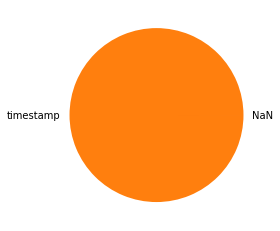

In [13]:
labels = 'NaN', 'timestamp'
plt.pie([nans, notnans], labels=labels)

<BarContainer object of 29 artists>

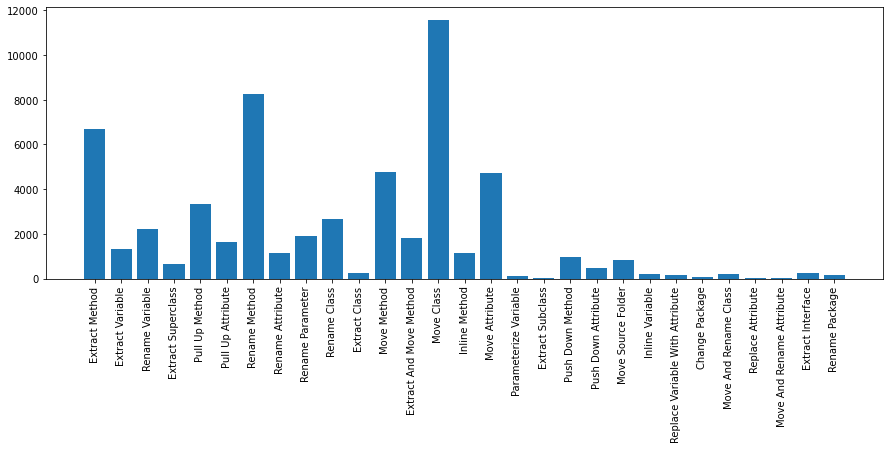

In [14]:
d = {}
for p in refactoringTypeNew:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())